In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import numpy as np
from scipy.linalg import expm
from scipy.optimize import curve_fit, minimize 

def unitary_product_with_ket_zero(pi_time, T_wait, delta, t_wait_T):
    omega = np.pi / (pi_time * 1e-6)
    t_pi_over_2 = (pi_time * 1e-6) / 2
    T_wait_s = T_wait*1e-6
    def U1(omega, t):
        H = np.array([[0, omega / 2],
                      [omega / 2, delta]], dtype=complex)
        U = expm(-1j * H * t)
        return U

    def U_wait(omega, t):
        H = np.array([[0, 0],
                      [0, delta]], dtype=complex)
        U = expm(-1j * H * t)
        return U

    def U2(omega, t):
        H = np.array([[0, omega * np.exp(-1j * 2 * np.pi * t_wait_T) / 2],
                      [omega * np.exp(1j * 2 * np.pi * t_wait_T) / 2, delta]], dtype=complex)
        U = expm(-1j * H * t)
        return U

    U1 = U1(omega, t_pi_over_2)
    U_wait = U_wait(omega, T_wait_s)
    U2 = U2(omega, t_pi_over_2)

    product = U2 @ U_wait @ U1

    ket_zero = np.array([1, 0], dtype=complex)
    result = product @ ket_zero
    state_pop = np.abs(result)**2
    return state_pop

def call_unitary_product_twice(pi_time, T_wait, delta):
    result1 = unitary_product_with_ket_zero(pi_time,T_wait, delta, 1/4)
    result2 = unitary_product_with_ket_zero(pi_time,T_wait, delta, 3/4)
    return result1[0], result2[0]

def fitting_function(delta, pi_time, T_wait, target_results):
    computed_result1, computed_result2 = call_unitary_product_twice(pi_time, T_wait, delta[0])
    target_result1, target_result2 = target_results
    error = (computed_result1 - target_result1)**2 + (computed_result2 - target_result2)**2
    return error
pi_time = 40
initial_delta_guess = 0
result1 = 0.4
result2 = 0.6
target_results = (result1 , result2)
T_wait = 100
result = minimize(fitting_function, initial_delta_guess, args=(pi_time, T_wait, target_results),method='Nelder-Mead')
optimized_delta = result.x[0]/[2*np.pi]
print(optimized_delta)

[-255.42814616]


In [11]:
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt

def unitary_product_with_ket_zero(pi_time, T, delta, t_wait_T):
    omega = np.pi / (pi_time * 1e-6)
    t_pi_over_2 = (pi_time * 1e-6) / 2

    def U1(omega, t):
        H = np.array([[0, omega / 2],
                      [omega / 2, delta]], dtype=complex)
        U = expm(-1j * H * t)
        return U

    def U_wait(omega, t):
        H = np.array([[0, 0],
                      [0, delta]], dtype=complex)
        U = expm(-1j * H * t)
        return U

    def U2(omega, t):
        H = np.array([[0, omega * np.exp(-1j * np.pi * (1+t_wait_T)) / 2],
                      [omega * np.exp(1j * np.pi * (1+t_wait_T)) / 2, delta]], dtype=complex)
        U = expm(-1j * H * t)
        return U

    U1 = U1(omega, t_pi_over_2)
    U_wait = U_wait(omega, T)
    U2 = U2(omega, t_pi_over_2)

    product = U2 @ U_wait @ U1

    ket_zero = np.array([1, 0], dtype=complex)
    result = product @ ket_zero
    # print(np.abs(result)**2)
    state_pop = np.abs(result)**2
    state_pop_0 = state_pop[0]
    return state_pop_0

# def unitary_product_with_ket_zero(pi_time, T, delta, t_wait_T):
#     omega = np.pi / (pi_time * 1e-6)
#     t_pi_over_2 = (pi_time * 1e-6) / 2

#     def U1(omega, t):
#         H = np.array([[0, omega / 2],
#                       [omega / 2, delta]], dtype=complex)
#         U = expm(-1j * H * t)
#         return U

#     def U_wait(omega, t):
#         H = np.array([[0, 0],
#                       [0, delta]], dtype=complex)
#         U = expm(-1j * H * t)
#         return U

#     def U2(omega, t):
#         H = np.array([[0, omega * np.exp(-1j *  np.pi * t_wait_T) / 2],
#                       [omega * np.exp(1j *  np.pi * t_wait_T) / 2, delta]], dtype=complex)
#         U = expm(-1j * H * t)
#         return U

#     U1 = U1(omega, t_pi_over_2)
#     U_wait = U_wait(omega, 2*T)
#     U2 = U2(omega, t_pi_over_2)

#     product = U2 @ U_wait @ U1

#     ket_zero = np.array([1, 0], dtype=complex)
#     result = product @ ket_zero
#     state_pop = np.abs(result)**2
#     return state_pop

def call_unitary_product_twice(pi_time, T, delta):
    result1 = unitary_product_with_ket_zero(pi_time, T, delta, 1/2)
    result2 = unitary_product_with_ket_zero(pi_time, T, delta, 3/2)
    return result1, result2

# Example usage
pi_time = 40
T = 100e-6
delta = 1234.56*np.pi*2
print(delta)
result1, result2 = call_unitary_product_twice(pi_time, T, delta)

print("State population with t_wait_T = 1/4:")
print(result1)
print("State population with t_wait_T = 3/4:")
print(result2)


7756.96925283163
State population with t_wait_T = 1/4:
0.08667724803133685
State population with t_wait_T = 3/4:
0.9133271267366684


In [13]:
%matplotlib widget

-7756.969273444512
Optimized delta value:
-1234.560003280642


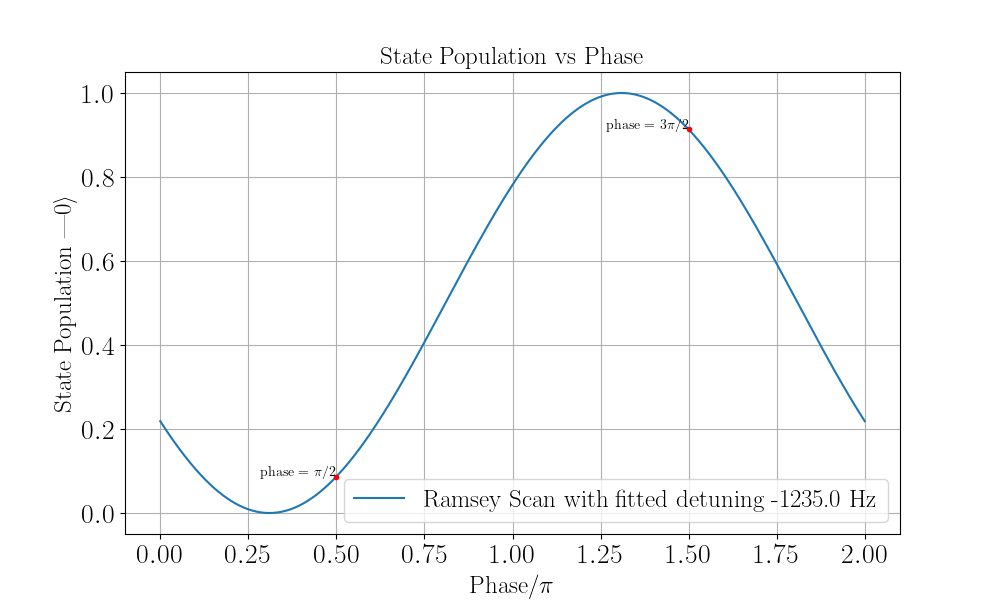

In [19]:
import numpy as np
from scipy.linalg import expm
from scipy.optimize import minimize
import matplotlib.pyplot as plt

def unitary_product_with_ket_zero(pi_time, T, delta, t_wait_T):
    omega = np.pi / (pi_time * 1e-6)
    t_pi_over_2 = (pi_time * 1e-6) / 2

    def U1(omega, t):
        H = np.array([[0, omega / 2],
                      [omega / 2, delta]], dtype=complex)
        U = expm(-1j * H * t)
        return U

    def U_wait(omega, t):
        H = np.array([[0, 0],
                      [0, delta]], dtype=complex)
        U = expm(-1j * H * t)
        return U

    def U2(omega, t):
        H = np.array([[0, omega * np.exp(-1j *  np.pi * (t_wait_T)) / 2],
                      [omega * np.exp(1j *  np.pi * (t_wait_T)) / 2, delta]], dtype=complex)
        U = expm(-1j * H * t)
        return U

    U1 = U1(omega, t_pi_over_2)
    U_wait = U_wait(omega, T)
    U2 = U2(omega, t_pi_over_2)

    product = U2 @ U_wait @ U1

    ket_zero = np.array([1, 0], dtype=complex)
    result = product @ ket_zero
    state_pop = np.abs(result)**2
    return state_pop[0]

def call_unitary_product_twice(pi_time, T, delta):
    result1 = unitary_product_with_ket_zero(pi_time, T, delta, 1/2)
    result2 = unitary_product_with_ket_zero(pi_time, T, delta, 3/2)
    return result1, result2

def fitting_function(delta, pi_time, T, target_results):
    computed_result1, computed_result2 = call_unitary_product_twice(pi_time, T, delta[0])
    target_result1, target_result2 = target_results
    error = (computed_result1 - target_result1)**2 + (computed_result2 - target_result2)**2
    return error

# Example usage
pi_time = 40
T = 100e-6
initial_delta_guess = [100 * 2 * np.pi]
# result1 =  0.28
# result2 = 0.73
target_results = (result1 , result2)  # Example target results, replace with actual target results

result = minimize(fitting_function, initial_delta_guess, args=(pi_time, T, target_results),method='Nelder-Mead')
optimized_delta = result.x[0]
print(optimized_delta)
print("Optimized delta value:")
print(optimized_delta/(2*np.pi))

# Plotting the results
t_wait_T_values = np.linspace(0, 2, 500)
state_populations = [unitary_product_with_ket_zero(pi_time, T, optimized_delta, t_wait_T) for t_wait_T in t_wait_T_values]

plt.figure(figsize=(10, 6))
plt.plot(t_wait_T_values, state_populations, label=f'Ramsey Scan with fitted detuning {np.round(optimized_delta/(2*np.pi))} Hz')

# Marking the target points
plt.scatter([1/2, 3/2], target_results, color='red', zorder=5,marker = '.')
plt.text(1/2, target_results[0], 'phase = ${\pi / 2}$', fontsize=10, ha='right')
plt.text(3/2, target_results[1], 'phase = ${3\pi / 2}$', fontsize=10, ha='right')

plt.xlabel('Phase/$\pi$')
plt.ylabel('State Population |0⟩')
plt.title('State Population vs Phase')
plt.legend()
plt.grid(True)
plt.savefig('example_fast_calibration.png',dpi = 300)
plt.show()


-7756.969273444512
Optimized delta value:
-1234.560003280642


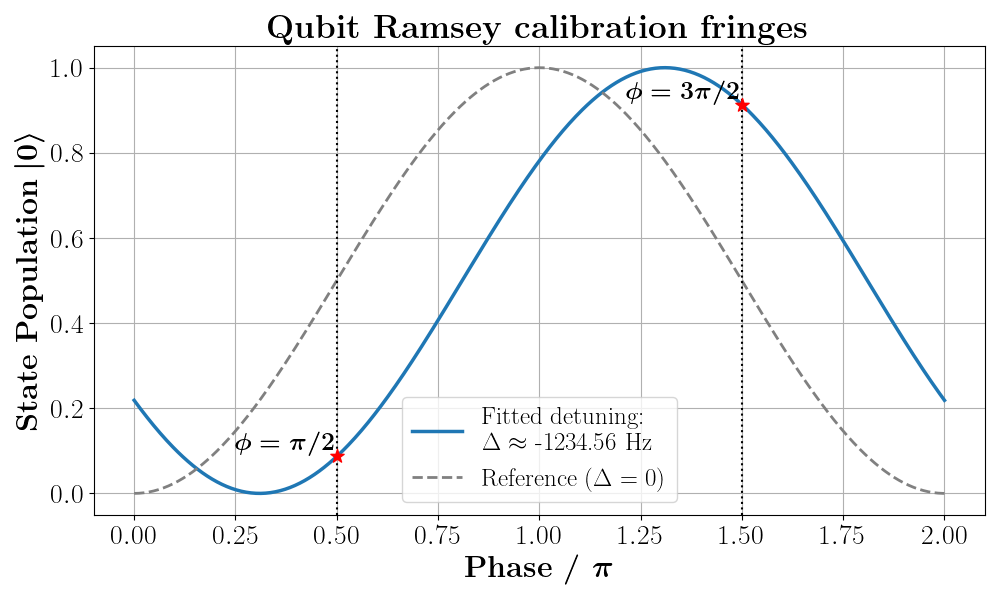

In [21]:
import numpy as np
from scipy.linalg import expm
from scipy.optimize import minimize
import matplotlib.pyplot as plt

from matplotlib import rcParams
import matplotlib.lines as mlines
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern']
rcParams['text.usetex'] = True

# Increase font sizes
rcParams['axes.titlesize'] = 18      # Title of the plot
rcParams['axes.labelsize'] = 18      # Axis labels
rcParams['xtick.labelsize'] = 20     # X tick labels
rcParams['ytick.labelsize'] = 20     # Y tick labels
rcParams['legend.fontsize'] = 18     # Legend text
rcParams['figure.titlesize'] = 20    # Figure-wide title (if used)

def unitary_product_with_ket_zero(pi_time, T, delta, t_wait_T):
    omega = np.pi / (pi_time * 1e-6)
    t_pi_over_2 = (pi_time * 1e-6) / 2

    def U1(omega, t):
        H = np.array([[0, omega / 2],
                      [omega / 2, delta]], dtype=complex)
        U = expm(-1j * H * t)
        return U

    def U_wait(omega, t):
        H = np.array([[0, 0],
                      [0, delta]], dtype=complex)
        U = expm(-1j * H * t)
        return U

    def U2(omega, t):
        H = np.array([[0, omega * np.exp(-1j *  np.pi * t_wait_T) / 2],
                      [omega * np.exp(1j *  np.pi * t_wait_T) / 2, delta]], dtype=complex)
        U = expm(-1j * H * t)
        return U

    U1 = U1(omega, t_pi_over_2)
    U_wait = U_wait(omega, T)
    U2 = U2(omega, t_pi_over_2)

    product = U2 @ U_wait @ U1

    ket_zero = np.array([1, 0], dtype=complex)
    result = product @ ket_zero
    state_pop = np.abs(result)**2
    return state_pop[0]

def call_unitary_product_twice(pi_time, T, delta):
    result1 = unitary_product_with_ket_zero(pi_time, T, delta, 1/2)
    result2 = unitary_product_with_ket_zero(pi_time, T, delta, 3/2)
    return result1, result2

def fitting_function(delta, pi_time, T, target_results):
    computed_result1, computed_result2 = call_unitary_product_twice(pi_time, T, delta[0])
    target_result1, target_result2 = target_results
    error = (computed_result1 - target_result1)**2 + (computed_result2 - target_result2)**2
    return error

# Example usage
pi_time = 40
T = 100e-6
initial_delta_guess = [100 * 2 * np.pi]
# result1 =  0.28
# result2 = 0.73
target_results = (result1 , result2)  # Example target results, replace with actual target results

result = minimize(fitting_function, initial_delta_guess, args=(pi_time, T, target_results),method='Nelder-Mead')
optimized_delta = result.x[0]
print(optimized_delta)
print("Optimized delta value:")
print(optimized_delta/(2*np.pi))

# Plotting the results
t_wait_T_values = np.linspace(0, 2, 500)
state_populations = [unitary_product_with_ket_zero(pi_time, T, optimized_delta, t_wait_T) for t_wait_T in t_wait_T_values]
reference_populations = [unitary_product_with_ket_zero(pi_time, T, 0, t_wait_T) for t_wait_T in t_wait_T_values]

plt.figure(figsize=(10, 6))

# Fitted curve
plt.plot(t_wait_T_values, state_populations, label=rf'Fitted detuning:' + '\n' +rf'$\Delta \approx$ {np.round(optimized_delta/(2*np.pi),2)} Hz', linewidth = 2.5)

# Reference curve
plt.plot(t_wait_T_values, reference_populations, '--', color='gray', label=r'Reference ($\Delta$ = 0)', linewidth = 2)

# Marking the target points
plt.scatter([1/2, 3/2], target_results, color='red', zorder=5, marker='*',s=100)
plt.text(1/2, target_results[0], r'\boldmath$\phi = \pi/2$', fontsize=18, ha='right', va='bottom')
plt.text(3/2, target_results[1], r'\boldmath$\phi = 3\pi/2$', fontsize=18, ha='right', va='bottom')

# Vertical lines
plt.axvline(x=0.5, color='black', linestyle=':', linewidth=1.5)
plt.axvline(x=1.5, color='black', linestyle=':', linewidth=1.5)

# Labels and title
plt.xlabel(r'\textbf{Phase / }\boldmath$\pi$',fontsize = 22)
plt.ylabel(r'\textbf{State Population} \boldmath$|0\rangle$',fontsize = 22)
plt.title(r'\textbf{Qubit Ramsey calibration fringes}',fontsize = 24)
plt.legend()
plt.grid(True)
plt.tight_layout()
# Save and show
plt.savefig('example_fast_calibration.svg')
plt.show()


Optimized delta (rad/s): 1256.6370614359175
Optimized delta (Hz): 200.00000000000006


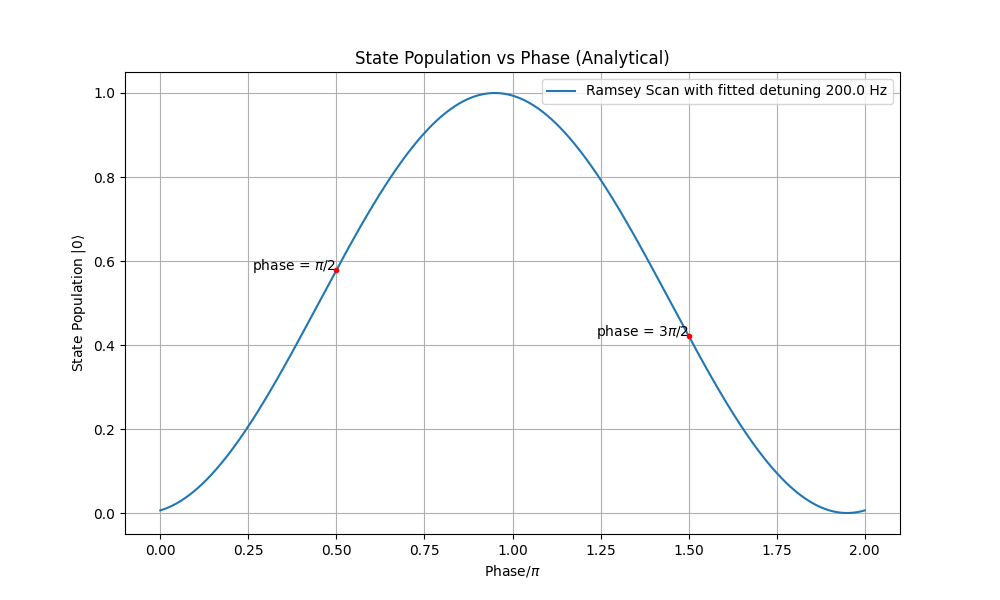

In [357]:
import numpy as np
from numpy import sin, cos, pi, exp, sqrt
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Pauli matrices
I = np.eye(2, dtype=complex)
σx = np.array([[0, 1], [1, 0]], dtype=complex)
σy = np.array([[0, -1j], [1j, 0]], dtype=complex)
σz = np.array([[1, 0], [0, -1]], dtype=complex)

def analytical_U(delta, omega, phi, t):
    lam = np.sqrt(delta**2 + omega**2)
    cos_term = cos(lam * t / 2) * I
    sin_term = -1j * sin(lam * t / 2) * (
        (delta / lam) * σz +
        (omega * cos(phi) / lam) * σx -
        (omega * sin(phi) / lam) * σy
    )
    return cos_term + sin_term

def unitary_product_with_ket_zero(pi_time, T, delta, t_wait_T):
    omega = np.pi / (pi_time * 1e-6)
    t_pi_over_2 = (pi_time * 1e-6) / 2
    phi = np.pi * t_wait_T

    U1 = analytical_U(delta, omega, 0, t_pi_over_2)
    U_wait = analytical_U(delta, 0, 0, T)
    U2 = analytical_U(delta, omega, phi, t_pi_over_2)

    U_total = U2 @ U_wait @ U1

    ket_zero = np.array([1, 0], dtype=complex)
    result = U_total @ ket_zero
    state_pop = np.abs(result)**2
    return state_pop[0]

def call_unitary_product_twice(pi_time, T, delta):
    result1 = unitary_product_with_ket_zero(pi_time, T, delta, 1/2)
    result2 = unitary_product_with_ket_zero(pi_time, T, delta, 3/2)
    return result1, result2

def fitting_function(delta, pi_time, T, target_results):
    computed_result1, computed_result2 = call_unitary_product_twice(pi_time, T, delta[0])
    target_result1, target_result2 = target_results
    error = (computed_result1 - target_result1)**2 + (computed_result2 - target_result2)**2
    return error

# Example usage
pi_time = 40
T = 100e-6
initial_delta_guess = [100 * 2 * np.pi]
# result1 = 0.28
# result2 = 0.73
target_results = (result1, result2)

result = minimize(fitting_function, initial_delta_guess, args=(pi_time, T, target_results), method='Nelder-Mead')
optimized_delta = result.x[0]
print("Optimized delta (rad/s):", optimized_delta)
print("Optimized delta (Hz):", optimized_delta / (2 * np.pi))

# Plotting the results
t_wait_T_values = np.linspace(0, 2, 500)
state_populations = [unitary_product_with_ket_zero(pi_time, T, optimized_delta, t_wait_T) for t_wait_T in t_wait_T_values]

plt.figure(figsize=(10, 6))
plt.plot(t_wait_T_values, state_populations, label=f'Ramsey Scan with fitted detuning {np.round(optimized_delta/(2*np.pi))} Hz')
plt.scatter([1/2, 3/2], target_results, color='red', zorder=5, marker='.')
plt.text(1/2, target_results[0], 'phase = ${\\pi / 2}$', fontsize=10, ha='right')
plt.text(3/2, target_results[1], 'phase = ${3\\pi / 2}$', fontsize=10, ha='right')
plt.xlabel('Phase/$\\pi$')
plt.ylabel('State Population $|0\\rangle$')
plt.title('State Population vs Phase (Analytical)')
plt.legend()
plt.grid(True)
plt.savefig('example_fast_calibration_analytical.png', dpi=300)
plt.show()
